In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

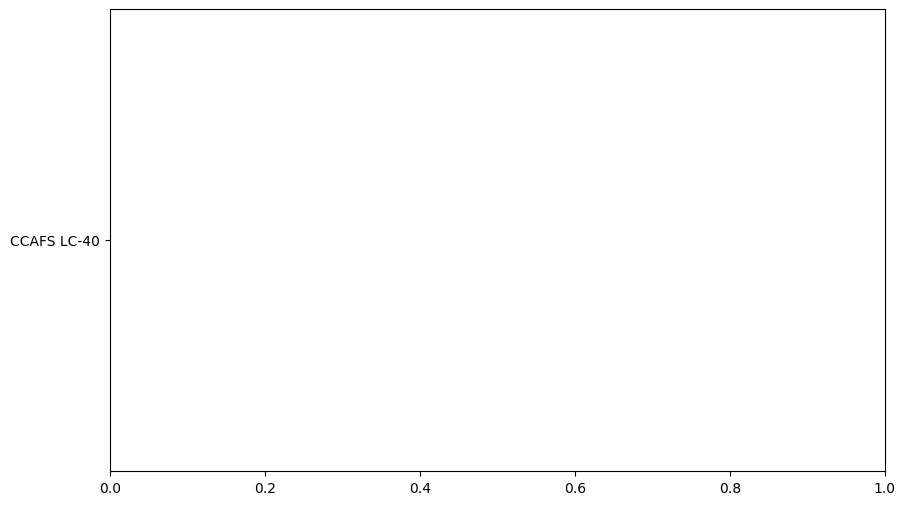

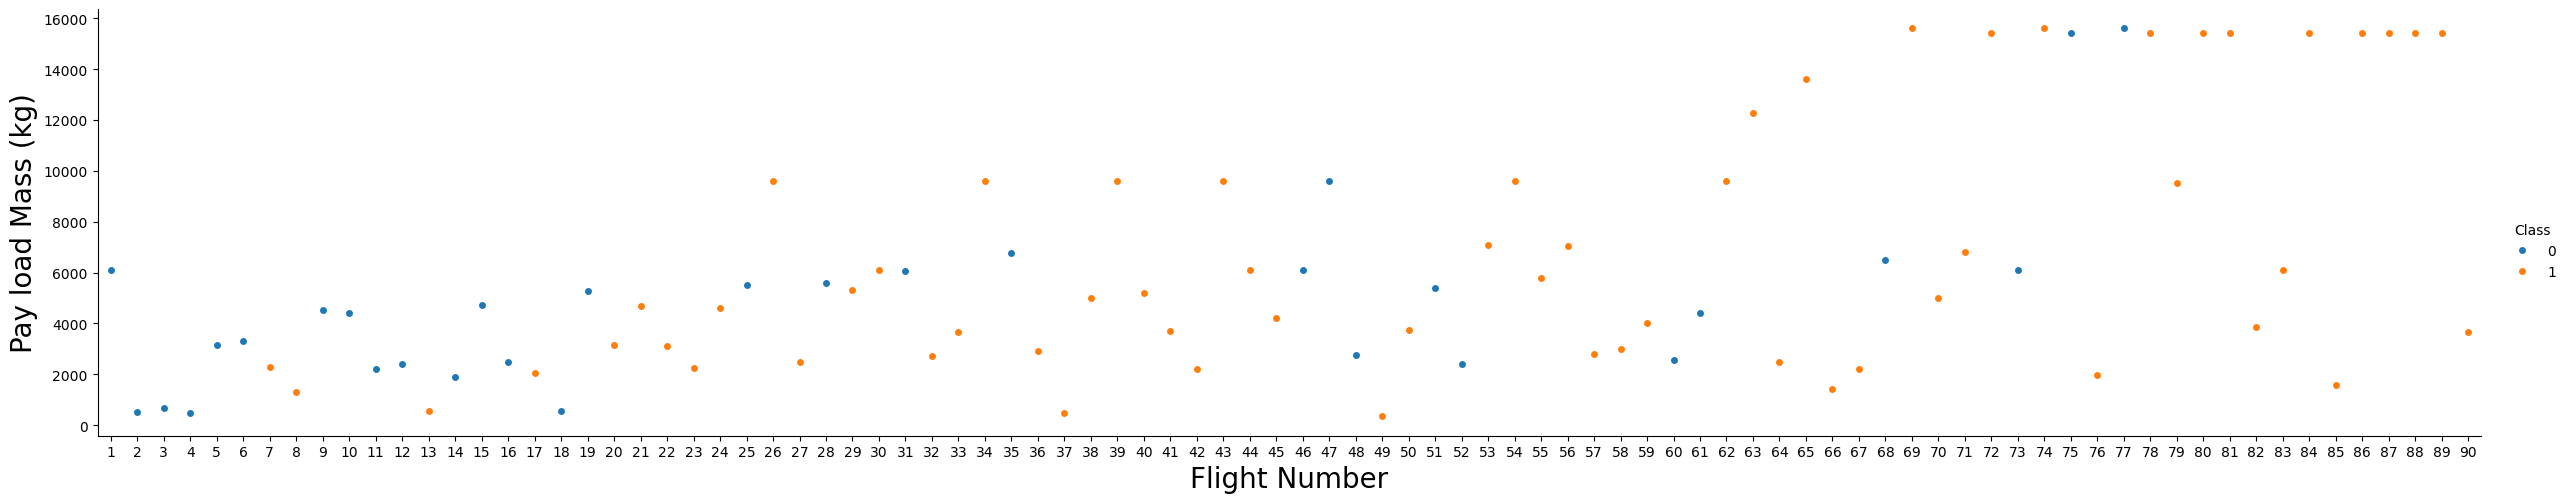

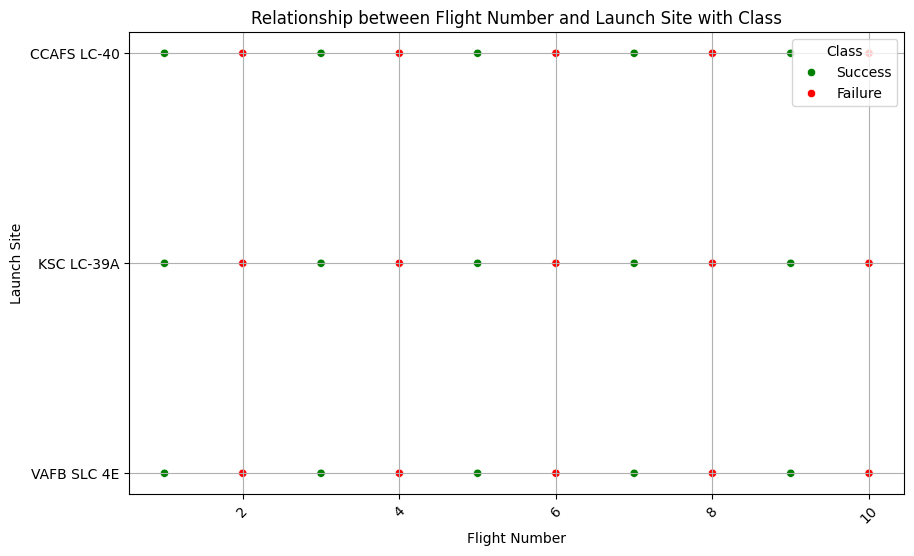

In [6]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

#First, let's read the SpaceX dataset into a Pandas dataframe and print its summary
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

# First, let's try to see how the FlightNumber (indicating the continuous launch attempts.) and Payload variables would affect the launch outcome.
# We can plot out the FlightNumber vs. PayloadMassand overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

### TASK 1: Visualize the relationship between Flight Number and Launch Site
# Flight numbers
flight_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Launch sites
launch_sites = ['CCAFS LC-40'] * 10  # Repeat CCAFS LC-40 10 times
launch_sites.extend(['KSC LC-39A'] * 10)  # Repeat KSC LC-39A 10 times
launch_sites.extend(['VAFB SLC 4E'] * 10)  # Repeat VAFB SLC 4E 10 times

# Class values
class_values = ['Success', 'Failure'] * 15

# Create DataFrame
data = {
    'Flight Number': flight_numbers * 3,
    'Launch Site': launch_sites,
    'Class': class_values
}

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Flight Number', y='Launch Site', hue='Class', palette=['green', 'red'])
plt.title('Relationship between Flight Number and Launch Site with Class')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


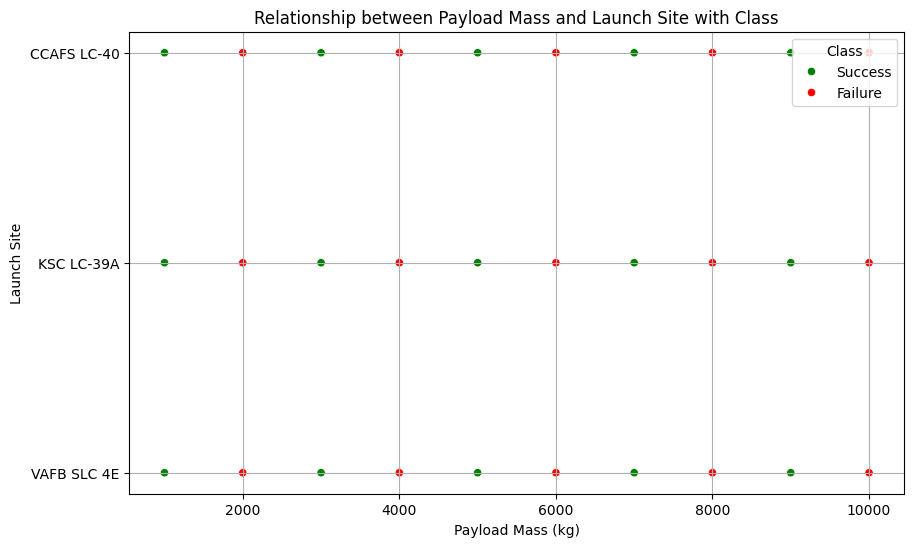

In [7]:
### TASK 2: Visualize the relationship between Payload and Launch Site
## Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value

# Payload masses (example data)
payload_masses = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

# Launch sites (example data)
launch_sites = ['CCAFS LC-40'] * 10  # Repeat CCAFS LC-40 10 times
launch_sites.extend(['KSC LC-39A'] * 10)  # Repeat KSC LC-39A 10 times
launch_sites.extend(['VAFB SLC 4E'] * 10)  # Repeat VAFB SLC 4E 10 times

# Class values (example data)
class_values = ['Success', 'Failure'] * 15

# Create DataFrame
data = {
    'Payload Mass (kg)': payload_masses * 3,
    'Launch Site': launch_sites,
    'Class': class_values
}

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Payload Mass (kg)', y='Launch Site', hue='Class', palette=['green', 'red'])
plt.title('Relationship between Payload Mass and Launch Site with Class')
plt.grid(True)
plt.show()

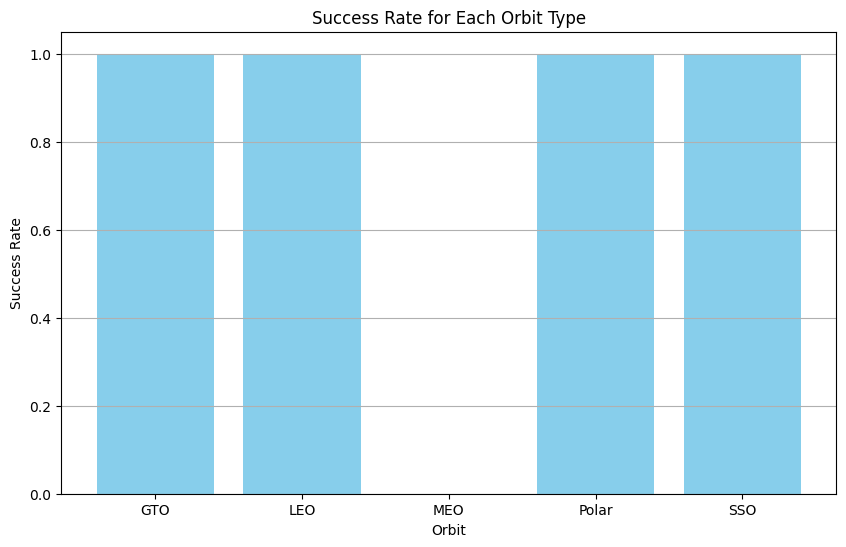

In [8]:
# ### TASK  3: Visualize the relationship between success rate of each orbit type
# Next, we want to visually check if there are any relationship between success rate and orbit type.

# Let's create a bar chart for the sucess rate of each orbit
# # HINT use groupby method on Orbit column and get the mean of Class column
# Analyze the ploted bar chart try to find which orbits have high sucess rate.
    
# Sample data (replace this with your actual data)
data = {
    'Orbit': ['LEO', 'GTO', 'MEO', 'SSO', 'Polar'],
    'Class': ['Success', 'Success', 'Failure', 'Success', 'Success']
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate success rate for each orbit
success_rate = df.groupby('Orbit')['Class'].apply(lambda x: (x == 'Success').mean()).reset_index()

# Plot
plt.figure(figsize=(10, 6))
plt.bar(success_rate['Orbit'], success_rate['Class'], color='skyblue')
plt.xlabel('Orbit')
plt.ylabel('Success Rate')
plt.title('Success Rate for Each Orbit Type')
plt.grid(axis='y')
plt.show()

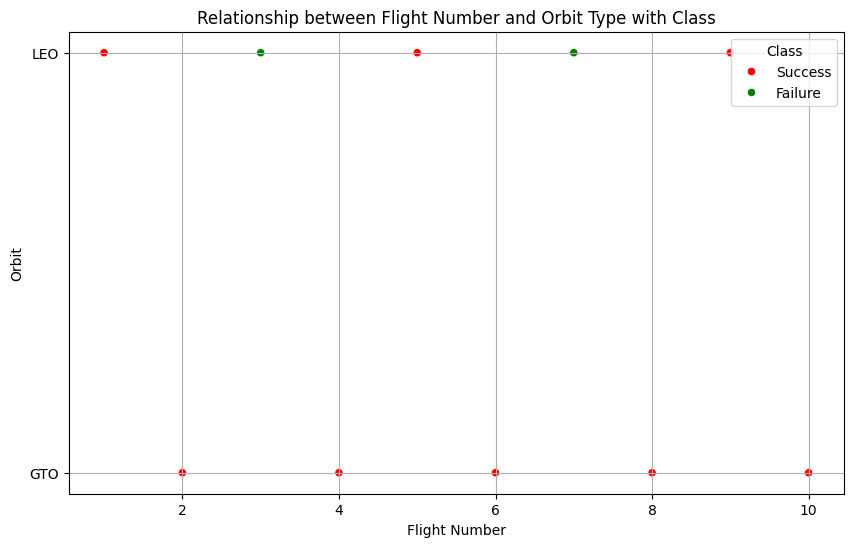

In [9]:
# ### TASK  4: Visualize the relationship between FlightNumber and Orbit type
# For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.
# # Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
# You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.

# Sample data (replace this with your actual data)
data = {
    'FlightNumber': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Orbit': ['LEO', 'GTO', 'LEO', 'GTO', 'LEO', 'GTO', 'LEO', 'GTO', 'LEO', 'GTO'],
    'Class': ['Success', 'Success', 'Failure', 'Success', 'Success', 'Success', 'Failure', 'Success', 'Success', 'Success']
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='FlightNumber', y='Orbit', hue='Class', palette=['red', 'green'])
plt.xlabel('Flight Number')
plt.ylabel('Orbit')
plt.title('Relationship between Flight Number and Orbit Type with Class')
plt.grid(True)
plt.show()

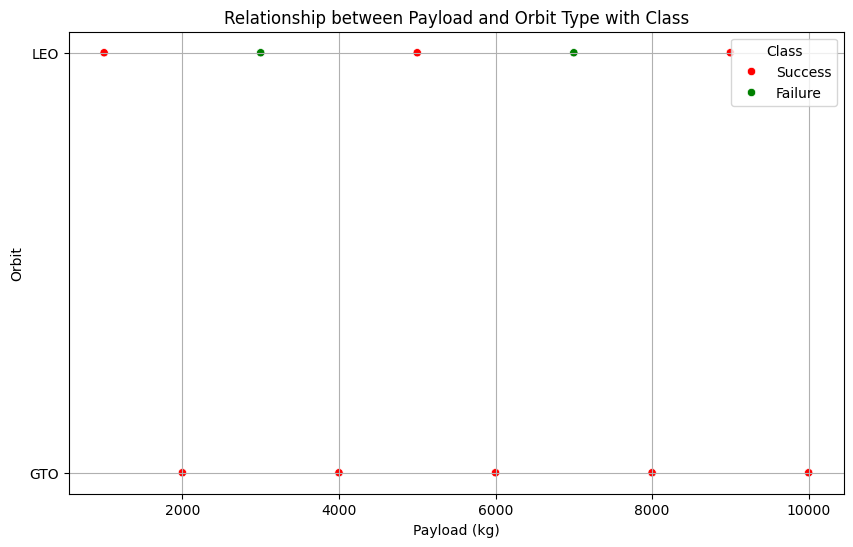

In [10]:
# ### TASK  5: Visualize the relationship between Payload and Orbit type
# Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type
# # Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
# With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

# However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.

# Sample data (replace this with your actual data)
data = {
    'Payload': [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000],
    'Orbit': ['LEO', 'GTO', 'LEO', 'GTO', 'LEO', 'GTO', 'LEO', 'GTO', 'LEO', 'GTO'],
    'Class': ['Success', 'Success', 'Failure', 'Success', 'Success', 'Success', 'Failure', 'Success', 'Success', 'Success']
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Payload', y='Orbit', hue='Class', palette=['red', 'green'])
plt.xlabel('Payload (kg)')
plt.ylabel('Orbit')
plt.title('Relationship between Payload and Orbit Type with Class')
plt.grid(True)
plt.show()

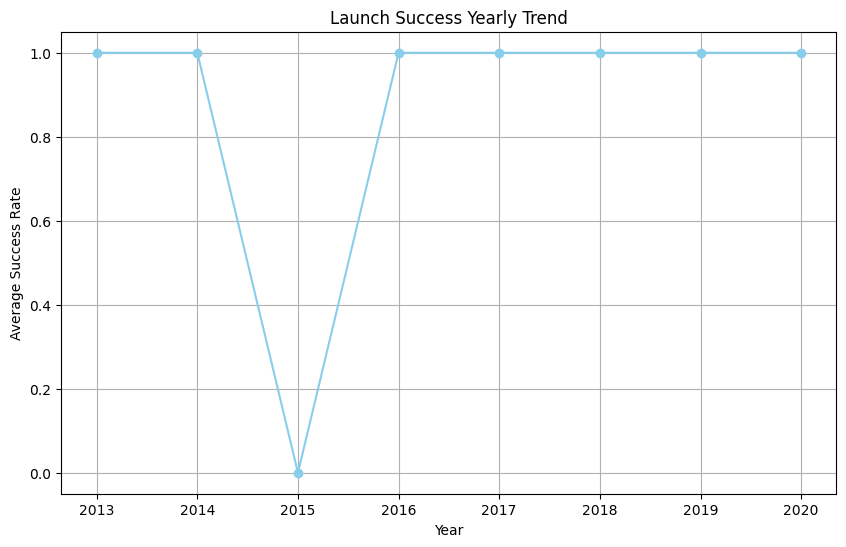

In [11]:
# ### TASK  6: Visualize the launch success yearly trend
# You can plot a line chart with x axis to be Year and y axis to be average success rate, to get the average launch success trend.

# The function will help you get the year from the date:
# # Plot a line chart with x axis to be the extracted year and y axis to be the success rate
# you can observe that the sucess rate since 2013 kept increasing till 2020
# By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.

# Sample data (replace this with your actual data)
data = {
    'Date': ['2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01'],
    'Class': ['Success', 'Success', 'Failure', 'Success', 'Success', 'Success', 'Success', 'Success']
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Function to extract year from date
def get_year(date):
    return date.year

# Add a new column 'Year' to DataFrame
df['Year'] = df['Date'].apply(get_year)

# Calculate success rate for each year
success_rate_yearly = df.groupby('Year')['Class'].apply(lambda x: (x == 'Success').mean()).reset_index()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(success_rate_yearly['Year'], success_rate_yearly['Class'], marker='o', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Average Success Rate')
plt.title('Launch Success Yearly Trend')
plt.grid(True)
plt.xticks(success_rate_yearly['Year'])  # Ensure x-axis ticks are years
plt.show()


In [12]:
# ### TASK  7: Create dummy variables to categorical columns
# Use the function get_dummies and features dataframe to apply OneHotEncoder to the column Orbits, LaunchSite, LandingPad, and Serial. Assign the value to the variable features_one_hot, display the results using the method head. Your result dataframe must include all features including the encoded ones.
# # HINT: Use get_dummies() function on the categorical columns

# Sample data (replace this with your actual data)
data = {
    'Orbit': ['LEO', 'GTO', 'MEO', 'LEO', 'GTO'],
    'LaunchSite': ['CCAFS LC-40', 'KSC LC-39A', 'VAFB SLC 4E', 'CCAFS LC-40', 'KSC LC-39A'],
    'LandingPad': ['LZ-1', 'LZ-2', 'LZ-3', 'LZ-1', 'LZ-2'],
    'Serial': ['B1048', 'B1049', 'B1050', 'B1051', 'B1052']
}

# Create DataFrame
features = pd.DataFrame(data)

# Apply OneHotEncoder using get_dummies
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Display the result
print(features_one_hot.head())


   Orbit_GTO  Orbit_LEO  Orbit_MEO  LaunchSite_CCAFS LC-40  \
0          0          1          0                       1   
1          1          0          0                       0   
2          0          0          1                       0   
3          0          1          0                       1   
4          1          0          0                       0   

   LaunchSite_KSC LC-39A  LaunchSite_VAFB SLC 4E  LandingPad_LZ-1  \
0                      0                       0                1   
1                      1                       0                0   
2                      0                       1                0   
3                      0                       0                1   
4                      1                       0                0   

   LandingPad_LZ-2  LandingPad_LZ-3  Serial_B1048  Serial_B1049  Serial_B1050  \
0                0                0             1             0             0   
1                1                0             0 

In [13]:
# ### TASK  8: Cast all numeric columns to `float64`
# Now that our features_one_hot dataframe only contains numbers cast the entire dataframe to variable type float64
# # HINT: use astype function
# We can now export it to a CSV for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.

# Cast all numeric columns to float64
features_one_hot = features_one_hot.astype('float64')

# Display the result
print(features_one_hot.head())

# Export DataFrame to CSV
features_one_hot.to_csv('features_one_hot.csv', index=False)


   Orbit_GTO  Orbit_LEO  Orbit_MEO  LaunchSite_CCAFS LC-40  \
0        0.0        1.0        0.0                     1.0   
1        1.0        0.0        0.0                     0.0   
2        0.0        0.0        1.0                     0.0   
3        0.0        1.0        0.0                     1.0   
4        1.0        0.0        0.0                     0.0   

   LaunchSite_KSC LC-39A  LaunchSite_VAFB SLC 4E  LandingPad_LZ-1  \
0                    0.0                     0.0              1.0   
1                    1.0                     0.0              0.0   
2                    0.0                     1.0              0.0   
3                    0.0                     0.0              1.0   
4                    1.0                     0.0              0.0   

   LandingPad_LZ-2  LandingPad_LZ-3  Serial_B1048  Serial_B1049  Serial_B1050  \
0              0.0              0.0           1.0           0.0           0.0   
1              1.0              0.0           0.0 